In [ ]:
 import pandas as pd
import numpy as np

In [ ]:
Data_train = pd.read_csv("dataPPKM.csv")
Data_test = pd.read_csv("dataPrediksi.csv")

In [ ]:
Data_train.head()

,Waktu,UserName,Teks,Retweet,Sentimen
0,7/23/2021 13:51,al,b'PPKM : Pelan - Pelan Kamu Melar https://t.co...,0,Negatif
1,7/23/2021 13:51,Lampung Post (Official),b'Polsek Kemiling Bandar Lampung membagikan ra...,0,Positif
2,7/23/2021 13:51,LaLa || HoL!day = H0ax ㅎㅁㅎ,b'Pusing dari tadi otak atik duit buat pengelu...,0,Negatif
3,7/23/2021 13:51,ifaa²³,"b'@hotmaanparis HHAHAHAHAH ppkm, jadi udah tut...",0,Negatif
4,7/23/2021 13:51,rai,b'@yeaaum ppkm',0,Positif


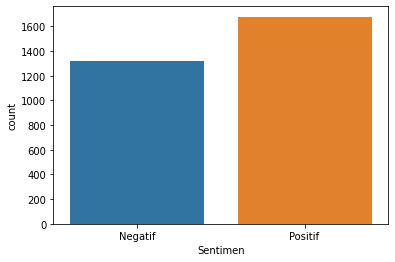

In [ ]:
import seaborn as sns
sns.countplot(x="Sentimen", data=Data_train,)

In [ ]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Waktu     3000 non-null   object
 1   UserName  3000 non-null   object
 2   Teks      3000 non-null   object
 3   Retweet   3000 non-null   int64 
 4   Sentimen  3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [ ]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Waktu     2000 non-null   object
 1   UserName  1999 non-null   object
 2   Teks      2000 non-null   object
 3   Retweet   2000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [ ]:
import re


In [ ]:
pip install sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#simpan kata-kata stopword

f = open("stopword_list_tala.txt", "r")
isi = f.read()

tempStoplist = []
for tempstp in isi.split():
  tempStoplist.append(tempstp.lower())

In [ ]:
cleantext = "(@[A-Za-z0-9_-]+)|([^A-Za-z \t\n])|(\w+:\/\/\S+)|(x[A-Za-z0-9]+)|(X[A-Za-z0-9]+)" #regex untuk remove punctuation

def preprocessing(teks):
  teks = teks.rstrip("\n")
  teks = re.sub(r'^https?:\/\/.*[\r\n]*', '', teks, flags=re.MULTILINE)
  teks = re.sub(cleantext,' ',str(teks).lower()).strip() #casefolding dan remove punctuation
 # teks = re.sub(r'[0-9]+', '', teks, flags=re.MULTILINE)
  tokens = []
  for token in teks.split():
    #if token in templist:
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token) #lakukan stemming
      if len(token) >= 2:
     #if token != 'b':
       if token != 'rt':
        tokens.append(token) 
  return " ".join(tokens)

In [ ]:
Data_train['teksbersih'] = Data_train.Teks.apply(lambda x:preprocessing(x))
Data_train.head()

,Waktu,UserName,Teks,Retweet,Sentimen,teksbersih
0,7/23/2021 13:51,al,b'PPKM : Pelan - Pelan Kamu Melar https://t.co...,0,Negatif,ppkm pelan pelan melar
1,7/23/2021 13:51,Lampung Post (Official),b'Polsek Kemiling Bandar Lampung membagikan ra...,0,Positif,polsek kemiling bandar lampung bagi ratus pake...
2,7/23/2021 13:51,LaLa || HoL!day = H0ax ㅎㅁㅎ,b'Pusing dari tadi otak atik duit buat pengelu...,0,Negatif,pusing otak atik duit keluar buldep nefek ppkm
3,7/23/2021 13:51,ifaa²³,"b'@hotmaanparis HHAHAHAHAH ppkm, jadi udah tut...",0,Negatif,hhahahahah ppkm udah tutup abang nya
4,7/23/2021 13:51,rai,b'@yeaaum ppkm',0,Positif,ppkm


In [ ]:
Data_train.drop(['Teks'],inplace=True,axis=1)
Data_train.head()

,Waktu,UserName,Retweet,Sentimen,teksbersih
0,7/23/2021 13:51,al,0,Negatif,ppkm pelan pelan melar
1,7/23/2021 13:51,Lampung Post (Official),0,Positif,polsek kemiling bandar lampung bagi ratus pake...
2,7/23/2021 13:51,LaLa || HoL!day = H0ax ㅎㅁㅎ,0,Negatif,pusing otak atik duit keluar buldep nefek ppkm
3,7/23/2021 13:51,ifaa²³,0,Negatif,hhahahahah ppkm udah tutup abang nya
4,7/23/2021 13:51,rai,0,Positif,ppkm


In [ ]:
label_train = Data_train['Sentimen'].to_numpy()
fitur_train = Data_train[['UserName','Retweet','teksbersih']]

print(fitur_train)

                        UserName  ...                                         teksbersih
0                             al  ...                             ppkm pelan pelan melar
1        Lampung Post (Official)  ...  polsek kemiling bandar lampung bagi ratus pake...
2     LaLa || HoL!day = H0ax ㅎㅁㅎ  ...     pusing otak atik duit keluar buldep nefek ppkm
3                         ifaa²³  ...               hhahahahah ppkm udah tutup abang nya
4                            rai  ...                                               ppkm
...                          ...  ...                                                ...
2995                      fadhil  ...                                           ppkm nde
2996                 ngAmericano  ...             ppkm gk sih sebenernya bal ak binggung
2997                 Hamba Allah  ...  hadeeuuuh nppkm tp gencar promo pariwisata npa...
2998                       araa🌻  ...                                  untung ppkm putih
2999                 

In [ ]:
y = Data_train['Sentimen']
x = Data_train['teksbersih']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=5)

klasifikasi dengan svm

In [ ]:
from sklearn import svm

clf_liner = svm.SVC(kernel='linear', C=100, random_state=42)
clf_rbf = svm.SVC(kernel='rbf', C=1, random_state=42)
clf_sigmoid = svm.SVC(kernel='sigmoid', C=1, random_state=42)
clf_poly = svm.SVC(kernel='poly', C=1, random_state=42)

In [ ]:
clf_liner.fit(x_train,y_train)
clf_rbf.fit(x_train,y_train)
clf_sigmoid.fit(x_train,y_train)
clf_poly.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_clf_linear = clf_liner.predict(x_test)
y_clf_rbf = clf_rbf.predict(x_test)
y_clf_sigmoid = clf_sigmoid.predict(x_test)
y_clf_poly = clf_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print("evaluasi linear ", classification_report(y_test, y_clf_linear),"\n")
print("evaluasi rbf ", classification_report(y_test, y_clf_rbf),"\n")
print("evaluasi sigmoid ", classification_report(y_test, y_clf_sigmoid),"\n")
print("evaluasi poly ", classification_report(y_test, y_clf_poly))

evaluasi linear                precision    recall  f1-score   support

     Negatif       0.52      0.55      0.54       258
     Positif       0.65      0.62      0.63       342

    accuracy                           0.59       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.59      0.59      0.59       600
 

evaluasi rbf                precision    recall  f1-score   support

     Negatif       0.59      0.44      0.50       258
     Positif       0.64      0.77      0.70       342

    accuracy                           0.62       600
   macro avg       0.61      0.60      0.60       600
weighted avg       0.62      0.62      0.61       600
 

evaluasi sigmoid                precision    recall  f1-score   support

     Negatif       0.58      0.51      0.54       258
     Positif       0.66      0.72      0.69       342

    accuracy                           0.63       600
   macro avg       0.62      0.61      0.61       600
weighted avg       0.

In [ ]:
#datatesting itu harus memiliki label dan dijadikan satu dengan yang dilakukan training (split training dan testing
#data testing yang tidak berlabel, bukan data testing tapi data yang perlu diprediksi)

In [ ]:
Data_test['teksbersih'] = Data_test.Teks.apply(lambda x:preprocessing(x))
Data_test.head()

In [ ]:
xpred = Data_test['teksbersih']

In [ ]:
pred = vectorizer.transform(xpred)

In [ ]:
Data_test['labelhasil']=clf_liner.predict(pred)

In [ ]:
import seaborn as sns
sns.countplot(x="labelhasil", data=Data_test)

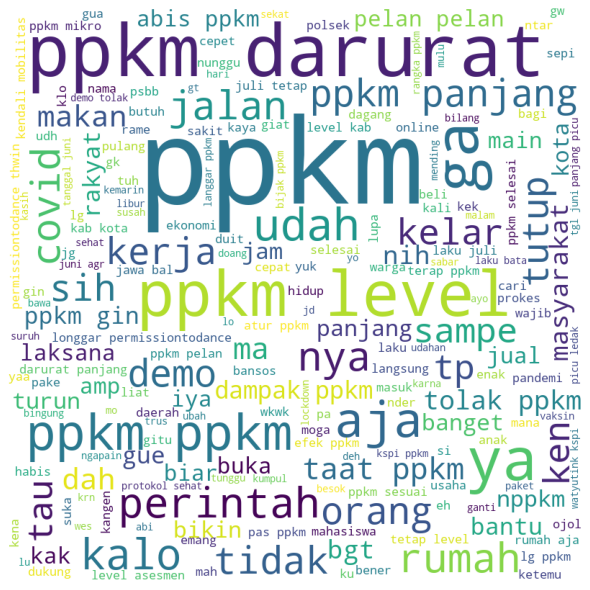

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ''
stopwords = set(STOPWORDS)
for val in Data_train.teksbersih:
     
    val = str(val)

    tokens = val.split()
   
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

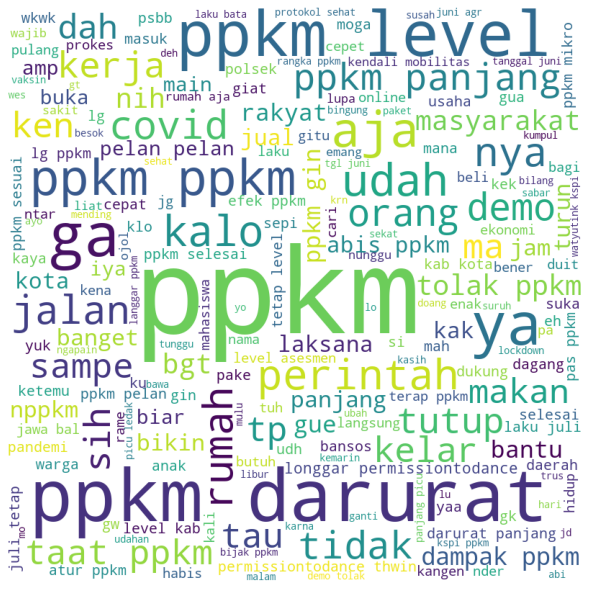

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ''
stopwords = set(STOPWORDS)
for val in Data_train.teksbersih:
      val = str(val)

      tokens = val.split()
    
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
Data_test.to_csv('prediksi.csv',encoding='utf-8')